## Importing libraries

In [66]:
import matplotlib.pyplot as plt
import numpy as np

## Data Preprocessing

In [67]:
np.random.seed(0)

segmentOne=np.random.randn(2000//3,2)+np.array([2,2])
segmentTwo=np.random.randn(2000//3,2)+np.array([-3,-3])
segmentThree=np.random.randn(2000//3,2)+np.array([-5,3])

In [68]:
X=np.concatenate((segmentOne,segmentTwo,segmentThree))

### Print Shape

In [69]:
X.shape

(1998, 2)

## Model

### Initialize clusters randomly

In [70]:
k=3

In [71]:
centers=X[np.random.choice(np.arange(X.shape[0]),size=k)]
centers

array([[-2.1908197 , -4.19809288],
       [ 2.82455722,  2.53117837],
       [-6.21251574,  2.91940148]])

### Plot clusters

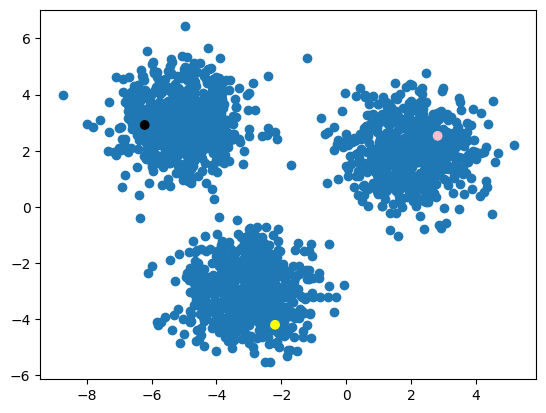

In [72]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1],c=['yellow','pink','black'])

### Find points's clusters and find new clusters

In [73]:
def reCluster(X,centers,k,plot=True):
    clusters=np.array([])
    averageClusterDistance=[]
    for i in X:
        distance=[np.linalg.norm(x-i) for x in centers]
        clusters=np.append(clusters,np.argmin(distance))
    for j in range(k):
        X_batch=X[clusters==j]
        averageClusterDistance.append(np.sum([np.linalg.norm(centers[j]-t) for t in X_batch]))
    if plot:
        plt.figure()
        plt.scatter(X[:,0],X[:,1],c=clusters)
        plt.scatter(centers[:,0],centers[:,1],c='red')
        plt.show()
    newCenters=np.array([])
    for i in range(k):
        newCenters=np.append(newCenters,np.array(np.mean(X[clusters==i],axis=0)))
    newCenters=newCenters.reshape(-1,X.shape[1])
    return sum(averageClusterDistance),newCenters

### Loop until convergence

In [74]:
count=0
for _ in range(10):
    prev=centers
    tmp,centers=reCluster(X,centers,k,plot=False)
    if np.array_equal(prev,centers):
        break
    print(centers)
    count+=1
print(f"Convergence in : {count} iterations")

[[-3.043441   -2.9886384 ]
 [ 1.97820946  1.96453641]
 [-5.09121122  2.99986439]]
[[-3.04475663 -2.98468709]
 [ 1.9829719   1.95951297]
 [-5.08711902  3.00839407]]
Convergence in : 2 iterations


## Best value for k

In [75]:
k=[1,2,3,4,5,6,7,8,9]
sumOfDistnces=[]
sums=0
print(k)
for i in k:
    centers=X[np.random.choice(np.arange(X.shape[0]),size=i)]
    count=0
    for _ in range(50):
        prev=centers
        sums,centers=reCluster(X,centers,i,plot=False)
        if np.array_equal(prev,centers):
            break
        count+=1
    sumOfDistnces.append(sums)
    print(f"Convergence in : {count} iterations")

[1, 2, 3, 4, 5, 6, 7, 8, 9]
Convergence in : 1 iterations
Convergence in : 3 iterations
Convergence in : 4 iterations
Convergence in : 17 iterations
Convergence in : 25 iterations
Convergence in : 23 iterations
Convergence in : 13 iterations
Convergence in : 29 iterations
Convergence in : 22 iterations


### Elbow Method

[8145.084211168582, 5713.3639410082715, 2466.866158464618, 2301.3546093548216, 2128.7725270613164, 2029.5692781489781, 1969.4155718072484, 1762.2969372550983, 1696.302682251375]


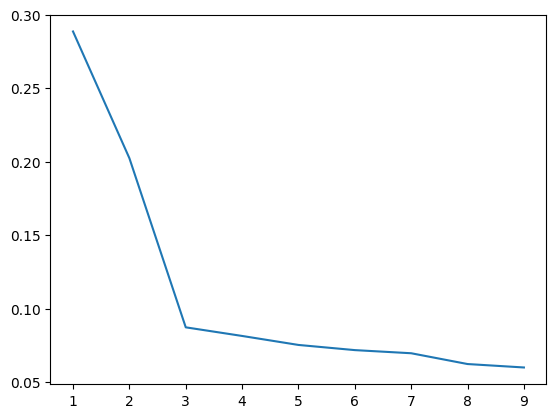

In [76]:
print(sumOfDistnces)
sumOfDistnces/=sum(sumOfDistnces)
plt.plot(k,sumOfDistnces)